# <center>Customer Satisfaction Prediction<center>
    
   <b>Presented by:</b>
        
   Soasingarayar Abonia
        
   M2-Artificial Intelligence-IA school
   
   Aissatou BA
   
   M1-Artificial Intelligence-IA school
        
   <b>Guided by:</b>
       
   Manel Boumaiza
       
   Prof. AI-IA School
   
## Motivation and Credits

1.Manel Boumaiza-Prof. AI-IA School


2.Kagglers

## Introduction

  In this kernel we will develop and compare different ML algorithm for to predict customer satisfaction based on their reviews.The goal of this section is to analyze what makes up satisfaction and disappointment. 
We will not focus on review scores prediction but rather on discovering where to take actions for increasing customer satisfaction. 
We ﬁrst try to understand which features are relevant to determine the review score.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

For this part, we make the use of the preprocessed dataset as a benchmark. We will then modify it 
for the purpose of the study.

In [2]:
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='brazilian e-commerce',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df = pd.read_sql_query(
    "select * from orders;",
    connection)

df = df.dropna(subset=['order_id','seller_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94625 entries, 0 to 94624
Data columns (total 36 columns):
order_id                         94625 non-null object
customer_id                      94625 non-null object
order_status                     94625 non-null object
order_purchase_timestamp         94625 non-null object
order_approved_at                94625 non-null object
order_delivered_carrier_date     94625 non-null object
order_delivered_customer_date    94625 non-null object
order_estimated_delivery_date    94625 non-null object
payment_sequential               94625 non-null int64
payment_type                     94625 non-null object
payment_installments             94625 non-null int64
payment_value                    94625 non-null float64
customer_unique_id               94625 non-null object
customer_zip_code_prefix         94625 non-null int64
customer_city                    94625 non-null object
customer_state                   94625 non-null object
review_id    

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29,178,1,400,19,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46,232,1,420,24,19,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59,468,3,450,30,10,20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38,316,4,250,51,15,15


## Customer behavior
As a premilinary analysis, we provide basic statistics on the customer purchasing behavior

Number of items purchased at each order

Text(0,0.5,'Counts')

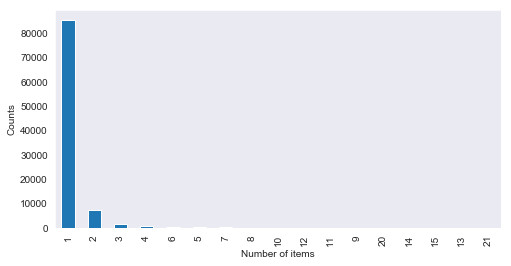

In [4]:

fig = plt.figure(figsize=(8,4))
df.order_item_id.value_counts().plot.bar()
plt.xlabel('Number of items')
plt.ylabel('Counts')

#plt.savefig('Counts_Items.eps',bbox_inches = 'tight')


Histogram on average payment (including freight), we discard outliers in the plot for a better representation.

Text(0,0.5,'Counts')

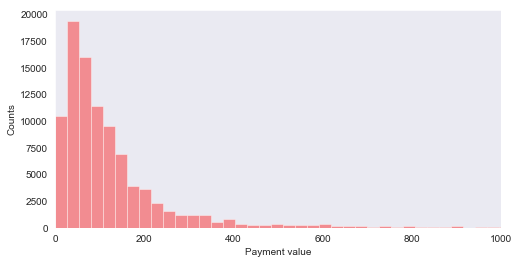

In [5]:
plt.figure(figsize=(8,4))
sns.distplot(df['price'],kde=False,bins=500,color='r')
plt.xlim([0,1000])
plt.xlabel('Payment value')
plt.ylabel('Counts')
#plt.savefig('Counts_paymentvalue.eps',bbox_inches = 'tight')

In [6]:
print('The median price is {}'.format((np.median(df['price']))))
print('The mean price is {}'.format((np.mean(df['price']))))

The median price is 86.5
The mean price is 137.29137564080685


Text(0,0.5,'Counts')

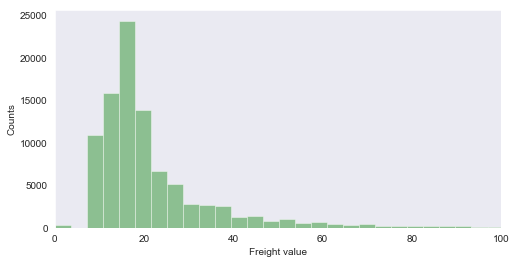

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['freight_value'],kde=False,bins=500,color='g')
plt.xlim([0,100])
plt.xlabel('Freight value')
plt.ylabel('Counts')
#plt.savefig('Counts_freight.eps',bbox_inches = 'tight')

In [8]:
np.max(df['payment_value'])

13664.08

Customer origin

Text(0,0.5,'Order counts')

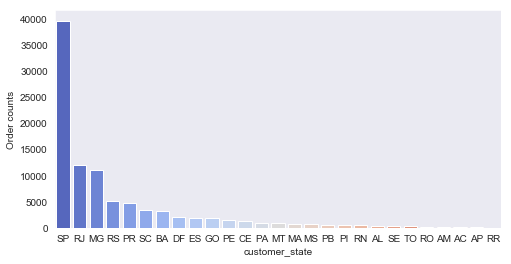

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'customer_state', data = df,order = df['customer_state'].value_counts().index, palette = "coolwarm")
plt.ylabel('Order counts')
#plt.savefig('Ordercounts_state.eps',bbox_inches = 'tight')

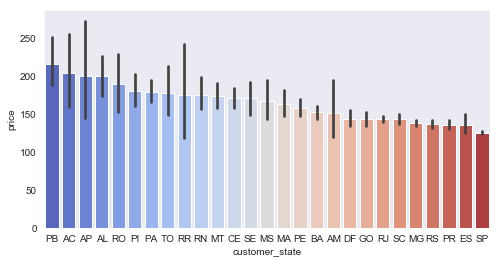

In [10]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state',y='price',data = df, order = df.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending = False).index, palette= "coolwarm")
#plt.savefig('Orderprice_state.eps',bbox_inches = 'tight')

In [11]:
order_by_customers = df.customer_unique_id.value_counts().to_frame()
np.max(order_by_customers['customer_unique_id'])

14

Text(0,0.5,'Counts')

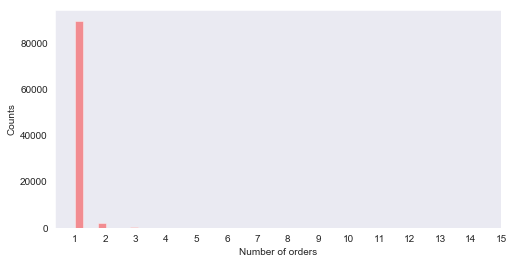

In [12]:
plt.figure(figsize=(8,4))
sns.distplot(order_by_customers['customer_unique_id'],kde=False,color = 'r')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of orders')
plt.ylabel('Counts')
#plt.savefig('customer_orders.eps',bbox_inches = 'tight')

# Review statistics

Counts of review score

Text(0,0.5,'%')

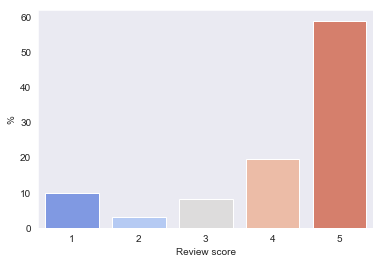

In [13]:
review_counts = df['review_score'].value_counts().to_frame().reset_index()
review_counts['score'] = review_counts['index']
review_counts['review_percentage'] = review_counts['review_score']/sum(review_counts['review_score'])*100
sns.barplot(x='score',y='review_percentage',data=review_counts,palette = "coolwarm")
plt.xlabel('Review score')
plt.ylabel('%')
#plt.savefig('review_score.eps')

In [14]:
df.groupby('customer_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score',ascending = False)


,customer_state,review_score
25,SP,4.238985
2,AM,4.237762
17,PR,4.232568
3,AP,4.223881
22,RS,4.182687
10,MG,4.180404
20,RO,4.178723
26,TO,4.159851
11,MS,4.156749
12,MT,4.139241


Average review by state

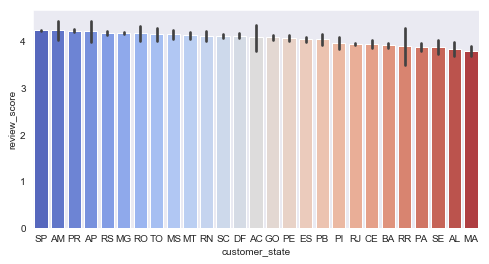

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state', y = 'review_score', data = df, order = df.groupby('customer_state').agg({'review_score':'mean'}).sort_values('review_score',ascending = False).index, palette = "coolwarm")
#plt.savefig('review_score_state.eps')

# Review analysis
In this part, we use ML techniques to determine what factors are affecting the most review scores.


We create new features that will can have an effect on the review score
- The estimated and real delivery time
- The delay in days (if order arrives in advance, it is just zero delays)
- A binary for review received before delivery. If the review has been received before the delivery: 1 otherwise: 0
- A binary for lateness. If the delivery is delayed: 1 otherwise:0 
- The freight ratio = freight_value/payment_value


In [16]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['estimated_delivery_time'] = (df['order_estimated_delivery_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['real_delivery_time'] = (df['order_delivered_customer_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['delay'] = (df['order_delivered_customer_date']-df['order_estimated_delivery_date']).dt.days.astype('timedelta64[D]')
df['review_before_delivery'] = (df['order_delivered_customer_date']-df['review_answer_timestamp']).dt.days.astype('timedelta64[D]')

df['estimated_delivery_time'] = (df['estimated_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['real_delivery_time'] = (df['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['delay'] = (df['delay']/np.timedelta64(1, 'D')).astype(int)
df['review_before_delivery'] = (df['review_before_delivery']/np.timedelta64(1, 'D')).astype(int)

df['delay'] = df['delay'].apply(lambda x: x if x>0 else 0)
df['review_before_delivery'] = df['review_before_delivery'].apply(lambda x: 1 if x>0 else 0)
df['late'] = df['delay'].apply(lambda x: 1 if x>0 else 0)
df['freight_ratio'] = df['freight_value']/df['price']

In [17]:
pd.set_option('display.max_columns', 50)
df.iloc[14]

order_id                                          dcb36b511fcac050b97cd5c05de84dc3
customer_id                                       3b6828a50ffe546942b7a473d70ac0fc
order_status                                                             delivered
order_purchase_timestamp                                       2018-06-07 19:03:12
order_approved_at                                              2018-06-12 23:31:02
order_delivered_carrier_date                                   2018-06-11 14:54:00
order_delivered_customer_date                                  2018-06-21 15:34:32
order_estimated_delivery_date                                  2018-07-04 00:00:00
payment_sequential                                                               1
payment_type                                                           credit_card
payment_installments                                                            10
payment_value                                                               146.45
cust

Distribution of real and estimated delivery times

(-10, 150)

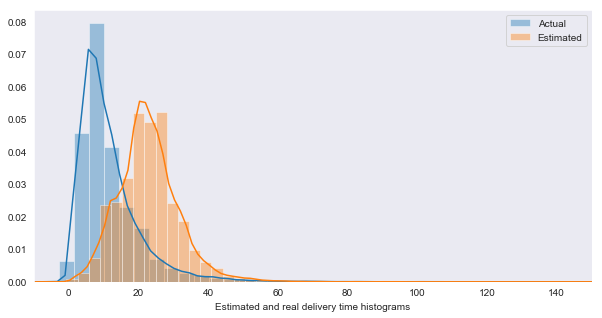

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['real_delivery_time'],label='Actual')
sns.distplot(df['estimated_delivery_time'],label='Estimated')
plt.xlabel('Estimated and real delivery time histograms')
plt.legend()
plt.xlim([-10,150])
#plt.savefig('histo_real_est.eps')

Boxplot of delay

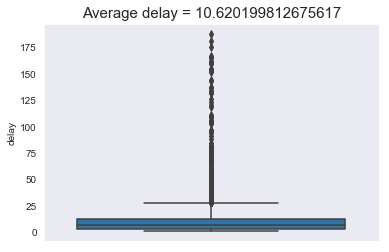

In [19]:
late_deliveries = df[df['delay']>0]
sns.boxplot(y='delay', data=late_deliveries)
plt.title('Late deliveries Delays (days)')
title = 'Average delay = {}'.format(np.mean(late_deliveries['delay']))
plt.title(title, size = 15);
#plt.savefig('delay_distr.eps')
plt.show()

Lateness frequency

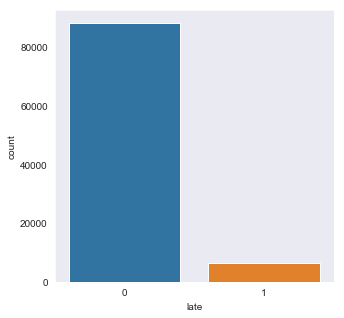

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='late', data = df)
#plt.savefig('late_freq.eps')

In [21]:
print('Late delivery frequency =  {}'.format(np.mean(df['late'])))

Late delivery frequency =  0.06769881109643329


Review survey fulfilled before delivery

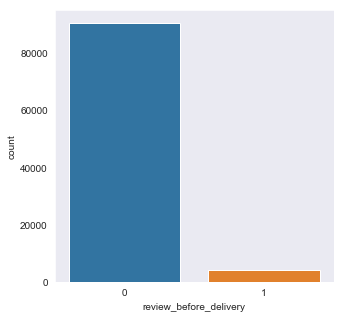

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='review_before_delivery', data = df)
#plt.savefig('review_before_delivery.eps')

Late freq. by state

Text(0,0.5,'Late delivery frequency')

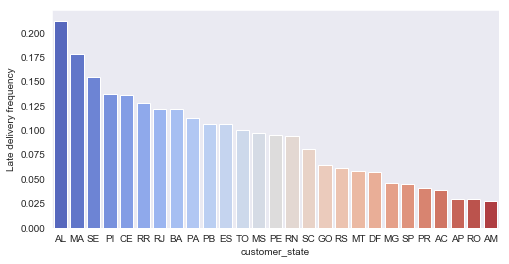

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state', y='late', data = df, 
            order = df.groupby('customer_state').agg({'late':'mean'}).sort_values('late', ascending = False).index,ci = None,palette = "coolwarm")
plt.ylabel('Late delivery frequency')
#plt.savefig('late_state.eps')

Effect of lateness on review score 

<Figure size 576x288 with 0 Axes>

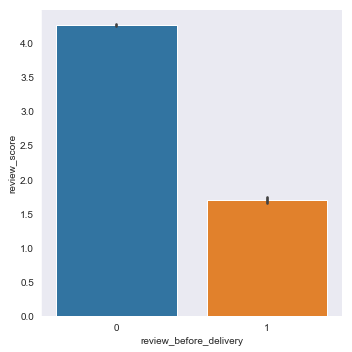

In [24]:
plt.figure(figsize=(8,4))
sns.catplot(x = 'review_before_delivery', y = 'review_score', data = df,kind="bar")
#plt.savefig('influence_review_early.eps')

Text(0,0.5,'Average review score')

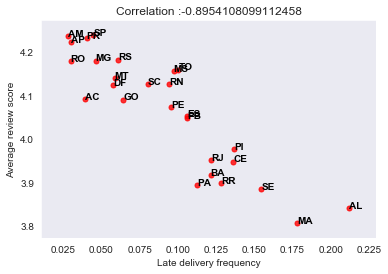

In [25]:
state_late_delivery_freq = df.groupby('customer_state').agg({'late':'mean'}).reset_index()
state_review_score       = df.groupby('customer_state').agg({'review_score':'mean'}).reset_index()
df_state_review = state_late_delivery_freq.merge(state_review_score, how = 'inner', on = 'customer_state')
corr = np.corrcoef(df_state_review.review_score,df_state_review.late)[0,1]
plt.figure(figsize=(6,4))
p1 = sns.regplot(x='late',y='review_score',data = df_state_review, color="r", marker=".",scatter_kws={'s':100},fit_reg=False)

for line in range(0,df_state_review.shape[0]):
     p1.text(df_state_review.late[line], df_state_review.review_score[line], df_state_review.customer_state[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')




plt.title('Correlation :{0}'.format(corr), size = 12)
plt.xlabel('Late delivery frequency')
plt.ylabel('Average review score')
#plt.savefig('regression_late_review.eps')

state_review_score

We pick the orders in the dataset that have been delivered

In [26]:
df_delivered = df[df['order_status']=='delivered']


In [27]:
len(df_delivered)

94619

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text xticklabel objects>)

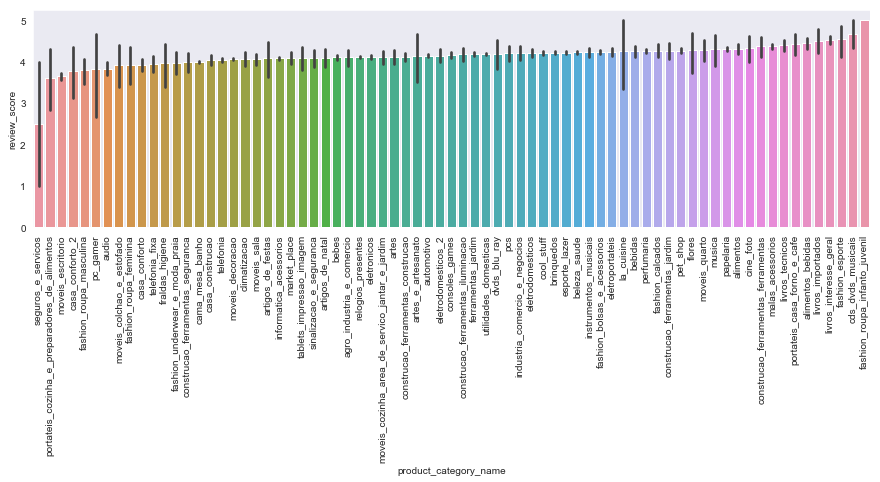

In [28]:
plt.figure(figsize=(15,4))

sns.barplot(x = 'product_category_name',y='review_score',data=df_delivered,
            order = df_delivered.groupby('product_category_name').agg({'review_score':'mean'}).sort_values('review_score').index)
plt.xticks(rotation =90)
#plt.savefig('review_category.eps',bbox_inches = 'tight')

We remove irrelevant features, for now we focus only on review scores

In [29]:
df_cs = df_delivered.drop(columns=['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at', 'product_category_name',
                                           'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential',
                                          'payment_type','payment_installments','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state',
                                   'review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','shipping_limit_date','seller_id','product_id'])

In [30]:
#df_cs= pd.concat([df_cs[df_cs['review_score'] == 5], df_cs[df_cs['review_score'] == 1]])

df_cs['simplified_review_score'] = df_cs['review_score'].apply(lambda x: 1 if (x==5 or x==4) else 0)
#df_cs.loc[df_cs.review_score == 3, 'simplified_review_score'] = 1

In [31]:
df_cs.dropna(how = 'any', inplace = True)

In [32]:
len(df_cs)

94619

For the following, we remove orders that contain more than one item. Indeed, for orders that contain more than one item 
the preprocessed dataset identify only the first item of the order. Therefore, we choose to add a little bias in order
to account for product features in the forthcoming analysis.

In [33]:
df_cs.order_item_id.value_counts()/len(df_cs)

1     0.900147
2     0.076623
3     0.013507
4     0.005136
6     0.001997
5     0.001987
7     0.000233
8     0.000085
10    0.000074
12    0.000053
11    0.000042
9     0.000032
20    0.000021
14    0.000021
15    0.000021
13    0.000011
21    0.000011
Name: order_item_id, dtype: float64

In [34]:
df_cs = df_cs[df_cs['order_item_id'] == 1.0]

In [35]:
df_cs.drop(columns = 'order_item_id',inplace = True)

In [36]:
df_cs.describe()

,payment_value,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000,85171.000000
mean,147.717232,4.204682,129.877602,20.370060,48.911085,800.770755,2.284064,2113.756208,30.085780,16.435782,23.045356,22.814092,11.719893,0.742753,0.044910,0.069413,0.302508,0.803313
std,201.074784,1.239164,196.336355,15.964991,9.963798,656.824135,1.763768,3772.686563,16.125294,13.231353,11.754605,8.737873,9.596069,4.727643,0.207107,0.254157,0.307241,0.397496
min,0.010000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,-6.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.075000,4.000000,44.050000,13.430000,43.000000,354.000000,1.000000,300.000000,18.000000,8.000000,15.000000,17.000000,6.000000,0.000000,0.000000,0.000000,0.129590,1.000000
50%,97.200000,5.000000,79.900000,16.500000,52.000000,614.000000,2.000000,700.000000,25.000000,13.000000,20.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.219733,1.000000
75%,164.845000,5.000000,144.410000,21.380000,57.000000,1003.000000,3.000000,1825.000000,38.000000,20.000000,30.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.372135,1.000000
max,6929.310000,5.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


We remove observations where the real_delivery_time takes negative value




In [37]:
df_cs= df_cs[df_cs['real_delivery_time']>0]
df_cs = df_cs[df_cs['estimated_delivery_time']>0]
df_cs.describe()

,payment_value,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000,84959.000000
mean,147.813114,4.204016,129.954025,20.392810,48.907756,800.797232,2.283407,2116.019633,30.095164,16.443249,23.050401,22.844560,11.750009,0.744206,0.044998,0.069481,0.302702,0.803129
std,201.187109,1.239589,196.447422,15.975689,9.965400,656.997574,1.763275,3775.081351,16.128729,13.235063,11.758118,8.722546,9.588681,4.733214,0.207301,0.254271,0.307431,0.397637
min,0.010000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.105000,4.000000,44.400000,13.440000,43.000000,354.000000,1.000000,300.000000,18.000000,8.000000,15.000000,17.000000,6.000000,0.000000,0.000000,0.000000,0.129677,1.000000
50%,97.260000,5.000000,79.900000,16.520000,52.000000,614.000000,2.000000,700.000000,25.000000,13.000000,20.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.219896,1.000000
75%,165.025000,5.000000,144.410000,21.400000,57.000000,1003.000000,3.000000,1825.000000,38.000000,20.000000,30.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.372423,1.000000
max,6929.310000,5.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


In [38]:
df_cs.drop(columns = ['product_name_lenght','product_height_cm','product_width_cm','product_weight_g','product_length_cm'],inplace = True)

In [39]:
corr = df_cs.apply(lambda x: pd.factorize(x)[0]).corr()

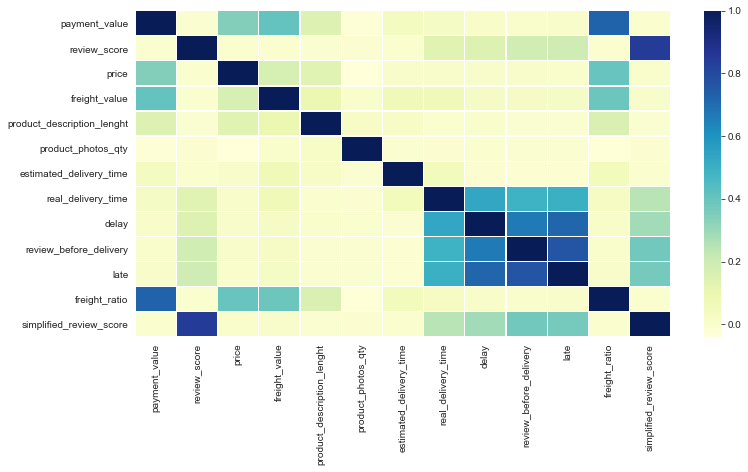

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
#plt.savefig('corr_review.eps',bbox_inches = 'tight')

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import f1_score

## Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

It is this breakdown that overcomes the limitation of using classification accuracy alone.

In our problem, we are often looking to discriminate between observations with a specific outcome, from normal observations.

Such as a Customer satisfied or event from Customer Not Satisfied or no event.

In this way, we can assign the event row as “positive” and the no-event row as “negative“. We can then assign the event column of predictions as “true” and the no-event as “false“.

This gives us:

“true positive” for correctly predicted event values.
“false positive” for incorrectly predicted event values.
“true negative” for correctly predicted no-event values.
“false negative” for incorrectly predicted no-event values.

### Accuracy
Classification accuracy is the total number of correct predictions divided by the total number of predictions made for a dataset.

As a performance measure, accuracy is inappropriate for imbalanced classification problems.

The main reason is that the overwhelming number of examples from the majority class (or classes) will overwhelm the number of examples in the minority class, meaning that even unskillful models can achieve accuracy scores of 90 percent, or 99 percent, depending on how severe the class imbalance happens to be.

An alternative to using classification accuracy is to use precision and recall metrics.

Accuracy: It is the measure of correctly classified results, irrespective of classes. It is also called as Overall Success Rate.Here we have built a model  with following results, where YES=Satisfied and NO=Not Satisfied

![title](img/cm.jpg) 
                
             Accuracy = (TruePositives + TruePositives)/ (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)
 
so therefore Accuracy of above model is 67.8%. Above formula is used to calculate.
### Precision
In an imbalanced classification problem with two classes, precision is calculated as the number of true positives divided by the total number of true positives and false positives.

                    Precision = TruePositives / (TruePositives + FalsePositives)

The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.

Let’s make this calculation concrete with some examples.

Consider a dataset with a 1:100 minority to majority ratio, with 100 minority examples and 10,000 majority class examples.

A model makes predictions and predicts 120 examples as belonging to the minority class, 90 of which are correct, and 30 of which are incorrect.

The precision for this model is calculated as:

                    Precision = TruePositives / (TruePositives + FalsePositives)
                    Precision = 90 / (90 + 30)
                    Precision = 90 / 120
                    Precision = 0.75
The result is a precision of 0.75, which is a reasonable value but not outstanding.

You can see that precision is simply the ratio of correct positive predictions out of all positive predictions made, or the accuracy of minority class predictions.

Consider the same dataset, where a model predicts 50 examples belonging to the minority class, 45 of which are true positives and five of which are false positives. We can calculate the precision for this model as follows:

                    Precision = TruePositives / (TruePositives + FalsePositives)
                    Precision = 45 / (45 + 5)
                    Precision = 45 / 50
                    Precision = 0.90
In this case, although the model predicted far fewer examples as belonging to the minority class, the ratio of correct positive examples is much better.

This highlights that although precision is useful, it does not tell the whole story. It does not comment on how many real positive class examples were predicted as belonging to the negative class, so-called false negatives.

### Recall 
In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

                    Recall = TruePositives / (TruePositives + FalseNegatives)

The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.

Let’s make this calculation concrete with some examples.

As in the previous section, consider a dataset with 1:100 minority to majority ratio, with 100 minority examples and 10,000 majority class examples.

A model makes predictions and predicts 90 of the positive class predictions correctly and 10 incorrectly. We can calculate the recall for this model as follows:

                    Recall = TruePositives / (TruePositives + FalseNegatives)
                    Recall = 90 / (90 + 10)
                    Recall = 90 / 100
                    Recall = 0.9
This model has a good recall.

So,
    
   <b>Precision</b> quantifies the number of positive class predictions that actually belong to the positive class.
    
   <b>Recall</b> quantifies the number of positive class predictions made out of all positive examples in the dataset.
    
   <b>F-Measure</b> provides a single score that balances both the concerns of precision and recall in one number.

In [42]:
def conf_mat(test_features,test_labels,y_pred,model):

    
    cm = confusion_matrix(test_labels, y_pred)
    score = model.score(test_features,test_labels)
    recall = recall_score(test_labels,y_pred,pos_label = 0)
    precision = precision_score(test_labels,y_pred,pos_label = 0)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score) + '\n' +'Recall Score: {0}'.format(recall) \
    + '\n' + 'Precision Score: {0}'.format(precision)
    plt.title(all_sample_title, size = 15);

In [43]:
features = df_cs.drop(columns=['review_score','simplified_review_score'])
labels = np.array(df_cs['simplified_review_score'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Undersample 

In [44]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


In [45]:
#Random Oversampling: Randomly duplicate examples in the minority class.
#Random Undersampling: Randomly delete examples in the majority class.

sampler = RandomUnderSampler(random_state=42,replacement=True)
X_rs, y_rs = sampler.fit_resample(train_features, train_labels)

smote = SMOTE(ratio='not majority')
X_train_smote, y_train_smote = smote.fit_sample(train_features,train_labels)

tl = TomekLinks(return_indices=True, ratio='majority')
X_tomek, y_tomek, id_tomek = tl.fit_sample(train_features, train_labels)

#TOMEK AND SMOTE
#X_train_tomek, y_train_tomek, id_tomek = tl.fit_sample(X_train_smote, y_train_smote)


## Algorithms
Here we going to use 5 different classifier algorithm with this dataset.
        
        XGBoost Classifier
        SVM Classifier
        Decision Tree Classifier
        Random Forest Classifier
        Extra Tree Classifier
        

<b>Random Forest</b>

Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [46]:
rfc = RandomForestClassifier()
rfc.fit(train_features,train_labels)


C:\Users\ABONIA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

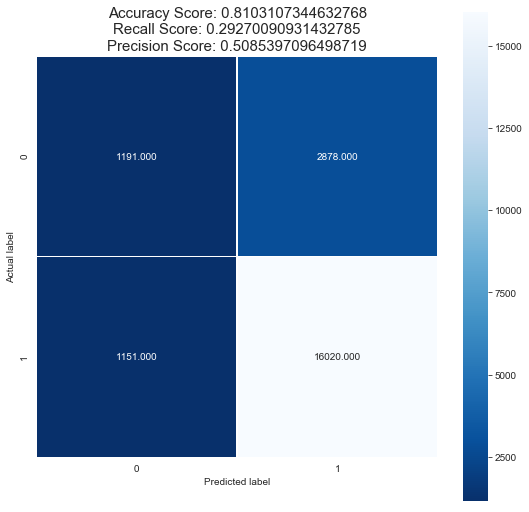

In [47]:
predictions = rfc.predict(test_features)
conf_mat(test_features,test_labels,predictions,rfc)

In [48]:
feature_list = df_cs.drop(columns=['review_score','simplified_review_score']).columns

In [49]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [50]:
feature_importances_rfc['importance'] = feature_importances_rfc['importance']/np.max(feature_importances_rfc['importance'])

In [51]:
feature_importances_rfc

,importance
product_description_lenght,1.000000
freight_ratio,0.943127
payment_value,0.938204
freight_value,0.845615
estimated_delivery_time,0.824639
price,0.795897
real_delivery_time,0.716324
review_before_delivery,0.596307
delay,0.509859
product_photos_qty,0.316829


<b>Decision Tree</b>

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

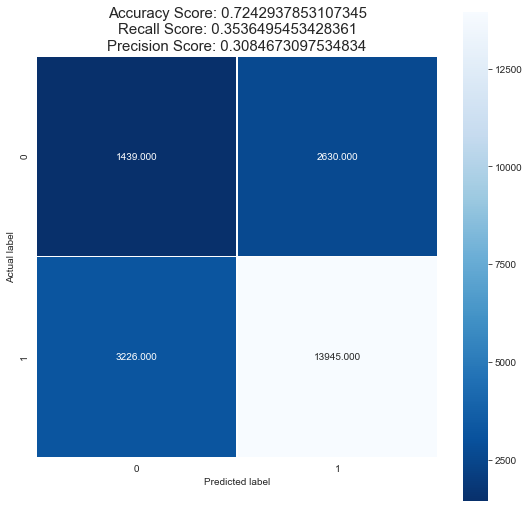

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_features,train_labels)
feature_importances_decisiontree = pd.DataFrame(dtc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)


predictions = dtc.predict(test_features)
conf_mat(test_features,test_labels,predictions,dtc)

In [53]:
feature_importances_decisiontree['importance']=feature_importances_decisiontree['importance']/np.max(feature_importances_decisiontree['importance'])

In [54]:
feature_importances_decisiontree

,importance
product_description_lenght,1.000000
delay,0.922073
estimated_delivery_time,0.762371
freight_ratio,0.729855
freight_value,0.657995
payment_value,0.656194
price,0.472107
real_delivery_time,0.460577
product_photos_qty,0.244131
review_before_delivery,0.074323


<b>Extremely Randomized Trees Classifier(Extra Trees Classifier)</b> is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(train_features,train_labels)

predictions = etc.predict(test_features)

C:\Users\ABONIA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


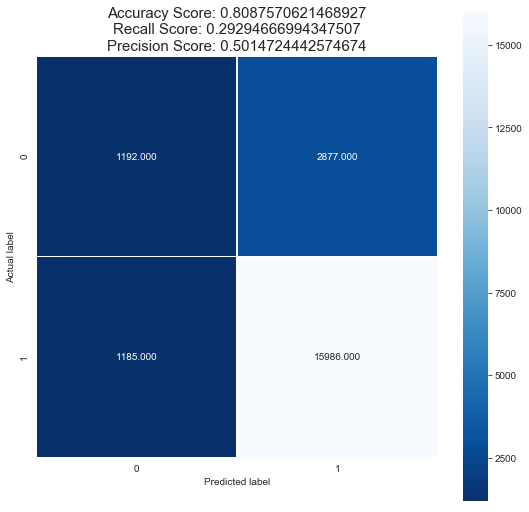

In [56]:
conf_mat(test_features,test_labels,predictions,etc)

In [57]:
feature_importances_etc = pd.DataFrame(etc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [58]:
feature_importances_etc['importance'] = feature_importances_etc['importance']/ np.max(feature_importances_etc['importance'])

In [59]:
feature_importances_etc

,importance
estimated_delivery_time,1.000000
product_description_lenght,0.961757
freight_ratio,0.925841
payment_value,0.914855
freight_value,0.891380
price,0.873774
review_before_delivery,0.726345
real_delivery_time,0.579771
late,0.422692
product_photos_qty,0.418139


# Feature Importance Visualisation

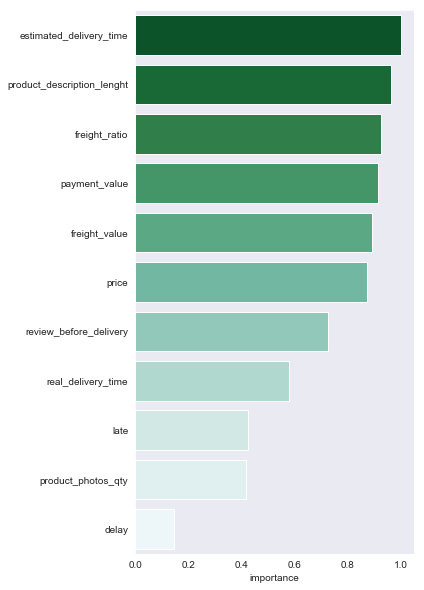

In [60]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_etc.index, x = feature_importances_etc.importance, data = feature_importances_etc,palette = "BuGn_r")
#plt.savefig('etc.eps',bbox_inches = 'tight')

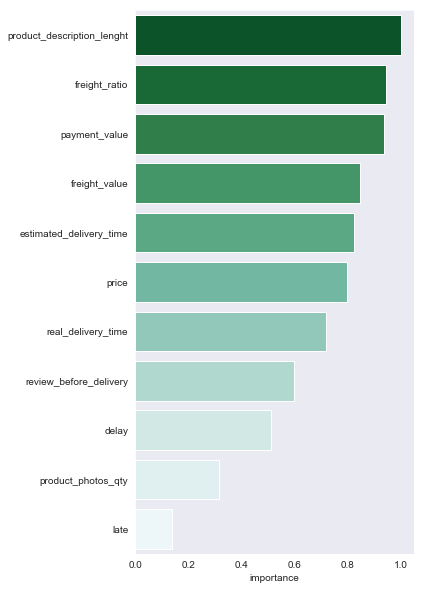

In [61]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_rfc.index, x = feature_importances_rfc.importance, data = feature_importances_etc,palette = "BuGn_r")

#plt.savefig('rfc.eps',bbox_inches = 'tight')

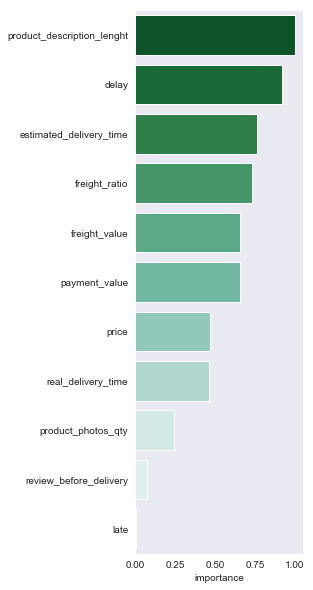

In [62]:
plt.figure(figsize = (3,10))

sns.barplot(y = feature_importances_decisiontree.index, x = feature_importances_decisiontree.importance, data = feature_importances_etc,palette = "BuGn_r")

#plt.savefig('dt.eps',bbox_inches = 'tight')

<b>XGBoost Classifier</b>
XGBoost stands for eXtreme Gradient Boosting.

The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost.

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
That XGBoost is a library for developing fast and high performance gradient boosting tree models.
That XGBoost is achieving the best performance on a range of difficult machine learning tasks.

In [63]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBClassifier()

# train
booster.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [64]:
predictions = booster.predict(test_features)

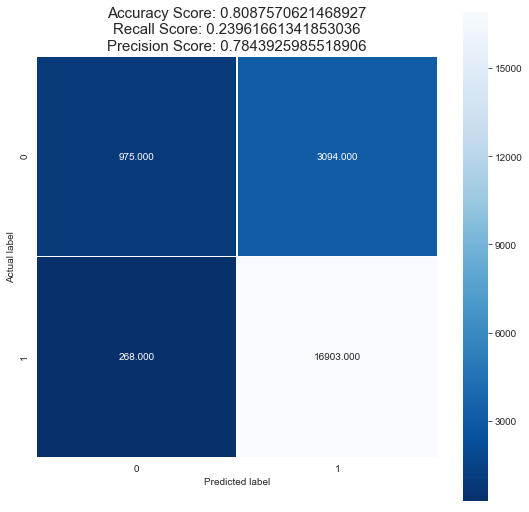

In [65]:
conf_mat(test_features,test_labels,predictions,etc)

Text(0.5,0,'Relative Feature Importance with XGBoost')

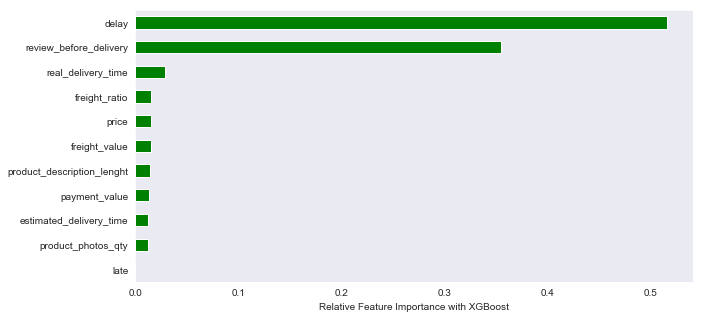

In [66]:
# plot the important features
feat_importances = pd.Series(booster.feature_importances_, index=features.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='green', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost')

<b>Support Vector Machine</b>

Definition: Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

Advantages: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

Disadvantages: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

C:\Users\ABONIA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


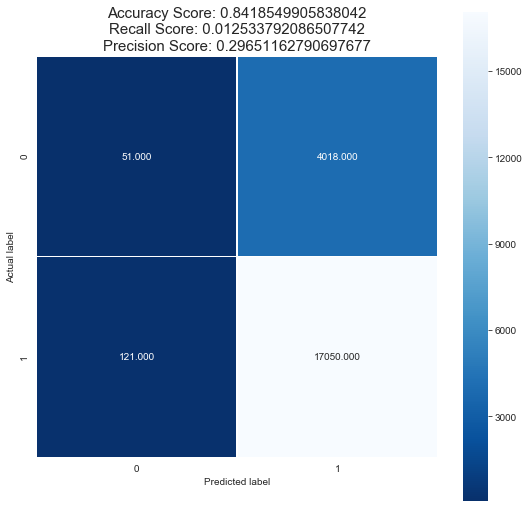

In [76]:
# create a baseline
import sklearn
svm = sklearn.svm.SVC()

# train
svm.fit(train_features, train_labels)
predictions = svm.predict(test_features)
conf_mat(test_features,test_labels,predictions,dtc)

# Hyperparameter optimization

### XGBoost Parameter Optimization
Some of the important hyperparameters to tune an XGBoost are:

    n_estimators = Number of trees one wants to build.
    learning_rate = Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.
    max_depth = Determines how deeply each tree is allowed to grow during any boosting round.
    colsample_bytree = Percentage of features used per tree.
    gamma = Specifies the minimum loss reduction required to make a split.

In [ ]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned algorithm
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned algorithm
booster_grid_search.fit(train_features, train_labels)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

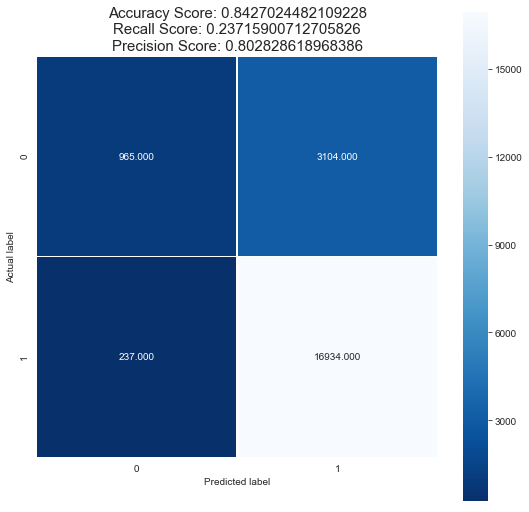

In [67]:
# instantiate xgboost with best parameters
booster = xgb.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.01,max_depth=3, n_estimators=100)
# train
booster.fit(train_features, train_labels)
predictions = booster.predict(test_features)
conf_mat(test_features,test_labels,predictions,booster)

Text(0.5,0,'Relative Feature Importance with XGBoost with best parameter')

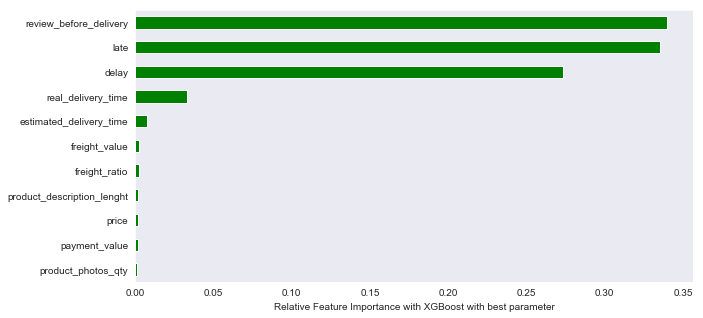

In [68]:
# plot the important features
feat_importances = pd.Series(booster.feature_importances_, index=features.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='green', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost with best parameter')

### Random Forest Parameter Optimization
We will try adjusting the following set of hyperparameters:

    n_estimators = number of trees in the foreset
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node


In [ ]:
# create Grid
param_grid = {'n_estimators': [100, 300, 500, 800, 1200],
              'max_depth': [5, 8, 15, 25, 30],
              'min_samples_split' :[2, 5, 10, 15, 100],
              'min_samples_leaf' : [1, 2, 5, 10] }

# instantiate the tuned random forest
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
rfc_grid_search.fit(train_features, train_labels)

# print best estimator parameters found during the grid search
print(rfc_grid_search.best_params_)

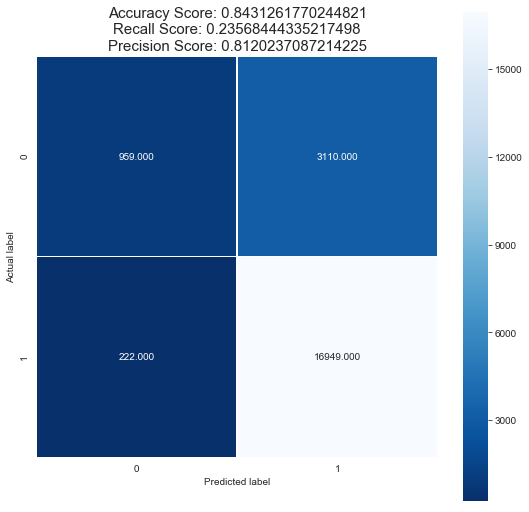

In [69]:
# instantiate random forest with best parameters
rfc = RandomForestClassifier(max_depth= 8, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
# train
rfc.fit(train_features, train_labels)
predictions = rfc.predict(test_features)
conf_mat(test_features,test_labels,predictions,rfc)

In [70]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rfc['importance'] = feature_importances_rfc['importance']/np.max(feature_importances_rfc['importance'])
feature_importances_rfc

,importance
delay,1.000000
late,0.729275
review_before_delivery,0.593870
real_delivery_time,0.416904
freight_value,0.058950
estimated_delivery_time,0.054635
freight_ratio,0.053540
product_description_lenght,0.052447
payment_value,0.050263
price,0.046457


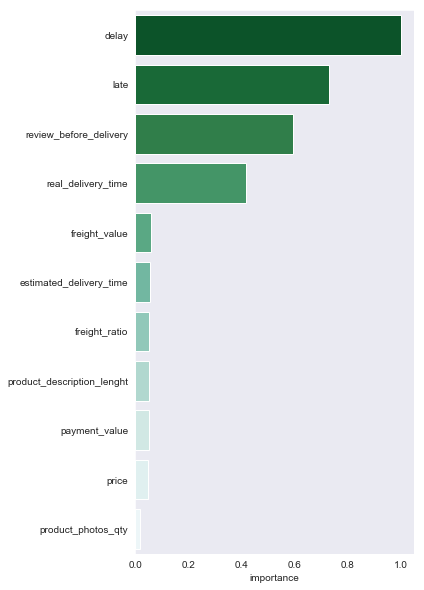

In [71]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_rfc.index, x = feature_importances_rfc.importance, data = feature_importances_etc,palette = "BuGn_r")

#plt.savefig('rfc.eps',bbox_inches = 'tight')

### SVM Parameter Optimization
    
    Kernels: The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.
    
    C (Regularisation): C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.
    
    Gamma: It defines how far influences the calculation of plausible line of separation.

In [ ]:
# create Grid
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid'] }

# instantiate the tuned algorithm
svm_grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)

# train the tuned algorithm
svm_grid_search.fit(train_features, train_labels)

# print best estimator parameters found during the grid search
print(svm_grid_search.best_params_)

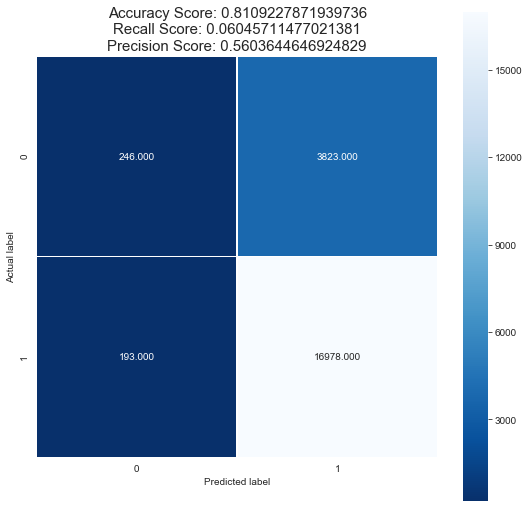

In [89]:
# instantiate svm with best parameters
svm = sklearn.svm.SVC(C=1.0, gamma=0.01,kernel='rbf')
# train
svm.fit(train_features, train_labels)
predictions = svm.predict(test_features)
conf_mat(test_features,test_labels,predictions,svm)

In [ ]:
#Use below code in case of using linear kernel
#feature_importances_svm = pd.DataFrame(svm.coef_,
#                                  index =  feature_list,
#                                   columns=['importance']).sort_values('importance', ascending=False)

#feature_importances_svm['importance'] = feature_importances_svm['importance']/np.max(feature_importances_svm['importance'])


#print(feature_importances_svm)

#plt.figure(figsize = (5,10))

#sns.barplot(y = feature_importances_svm.index, x = feature_importances_svm.importance, data = feature_importances_svm,palette = "BuGn_r")

#plt.savefig('rfc.eps',bbox_inches = 'tight')

### Decision Tree parameter optimization
    
    max_depth = The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
    max_features=The number of features to consider when looking for the best split.
    
    min_samples_leaf=The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
    
    criterion=The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [94]:
# create Grid
param_grid = {"max_depth": [3,4],
              "max_features": [2,4,6,7,8],
              "min_samples_leaf": [2,4,6,7,8],
              "criterion": ["gini", "entropy"]}

# instantiate the tuned algorithm
dtc_grid_search = GridSearchCV(dtc, param_grid, cv=3, n_jobs=-1)

# train the tuned algorithm
dtc_grid_search.fit(train_features, train_labels)

# print best estimator parameters found during the grid search
print(dtc_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 6}


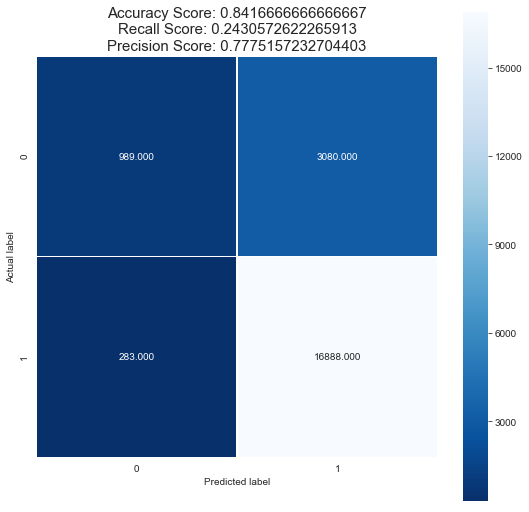

In [96]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=4,min_samples_leaf=6)

dtc.fit(train_features,train_labels)
feature_importances_decisiontree = pd.DataFrame(dtc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)


predictions = dtc.predict(test_features)
conf_mat(test_features,test_labels,predictions,dtc)

In [97]:
feature_importances_decisiontree['importance']=feature_importances_decisiontree['importance']/np.max(feature_importances_decisiontree['importance'])
feature_importances_decisiontree

,importance
delay,1.000000
real_delivery_time,0.078917
review_before_delivery,0.077961
price,0.003783
payment_value,0.002349
freight_value,0.001503
product_description_lenght,0.000000
product_photos_qty,0.000000
estimated_delivery_time,0.000000
late,0.000000


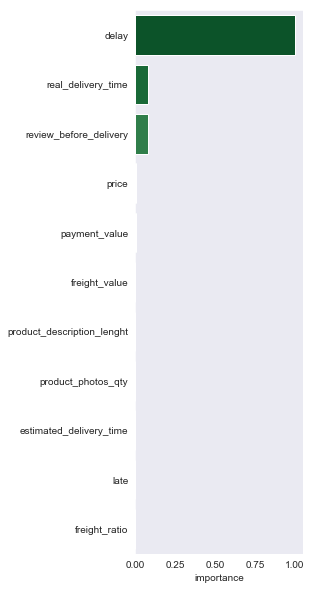

In [106]:
plt.figure(figsize = (3,10))

sns.barplot(y = feature_importances_decisiontree.index, x = feature_importances_decisiontree.importance, data = feature_importances_etc,palette = "BuGn_r")

#plt.savefig('dt.eps',bbox_inches = 'tight')

### Extra Tree Classifier Parameter Optimization

    Explore Number of Trees=An important hyperparameter for Extra Trees algorithm is the number of decision trees used in the ensemble.
    Explore Number of Features=The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for Extra Trees, as it is for Random Forest.
    Explore Minimum Samples per Split= the number of samples in a node of the decision tree before adding a split.


In [100]:
# create Grid
param_grid = {'n_estimators': [100, 300, 500],
             'max_features':[4,5,6,7],
             'min_samples_split' :[2, 5, 10, 15, 100]}

# instantiate the tuned algorithm
etc_grid_search = GridSearchCV(etc, param_grid, cv=3, n_jobs=-1)

# train the tuned algorithm
etc_grid_search.fit(train_features, train_labels)

# print best estimator parameters found during the grid search
print(etc_grid_search.best_params_)

{'max_features': 4, 'min_samples_split': 100, 'n_estimators': 100}


In [101]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100,max_features=4,min_samples_split=100)
etc.fit(train_features,train_labels)

predictions = etc.predict(test_features)

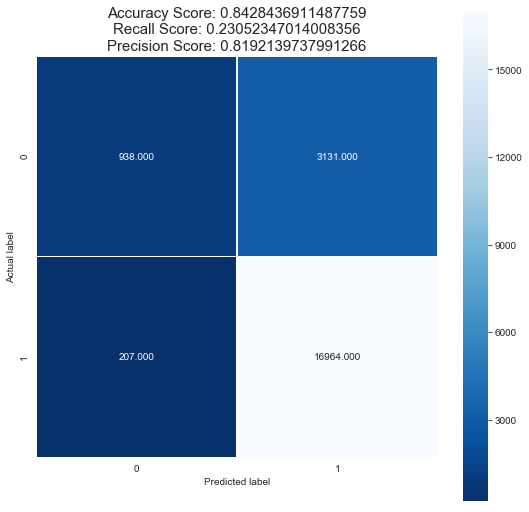

In [102]:
conf_mat(test_features,test_labels,predictions,etc)

In [103]:
feature_importances_etc = pd.DataFrame(etc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_etc['importance'] = feature_importances_etc['importance']/ np.max(feature_importances_etc['importance'])
feature_importances_etc

,importance
review_before_delivery,1.000000
late,0.744386
real_delivery_time,0.222144
delay,0.115654
estimated_delivery_time,0.070179
product_description_lenght,0.066880
freight_value,0.065549
freight_ratio,0.059878
price,0.058080
payment_value,0.057968


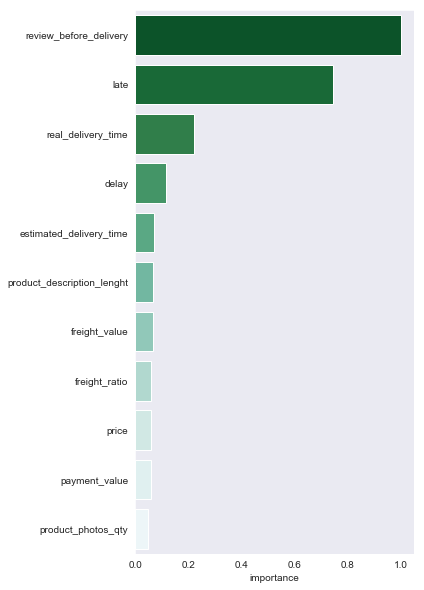

In [104]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_etc.index, x = feature_importances_etc.importance, data = feature_importances_etc,palette = "BuGn_r")
#plt.savefig('etc.eps',bbox_inches = 'tight')

# Future Work

1.Dataset preprocessing must be improved further to produce better result.


2.Using only the top best important features with algorithm can improve model performance


3.Use different parameter with different values can also improve the model performance in future



# Conclusion 

As our model performance is good still need a improvement in future.

Those were highlighted by customers directly on the surveys through review comments. 

We came to the conclusion that mostly, customers were happy when the order was shipped fast, i.e, before the estimated delivery date and the received product quality matched their expectations online. Likewise, they did not hesitate to show their discontent when it was not the case. 


# References
[1] Kaggle Brazilian E-Commerce Public Dataset by Olist:https://www.kaggle.com/olistbr/brazilian-ecommerce

[2] Customer Satisfaction Prediction on Brazilian E-Commerce dataset :https://www.kaggle.com/khakim17/custumer-satisfaction-prediction-and-analysist

[3] Customer Spend, Satisfaction and Segmentation using Machine Learning Techniques:https://medium.com/@horlaneyee/customer-spend-satisfaction-and-segmentation-using-machine-learning-techniques-15822b60f5b1

[4] Review Prediction Brazilian E-Commerce Dataset By Olist:https://medium.com/@deelipku23/review-prediction-brazilian-e-commerce-dataset-7f4312e0e5d5

[5] Relationships Using an EER Diagram:https://dev.mysql.com/doc/workbench/en/wb-relationship-tools.html


